In [1]:
# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Get the data
data_source_url = "https://raw.githubusercontent.com/itsahmedmohamedamin/Text-Analytics---Airline-Tweets-Word-Clusters-/main/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [9]:
# Visualizing the Data

<Axes: ylabel='airline'>

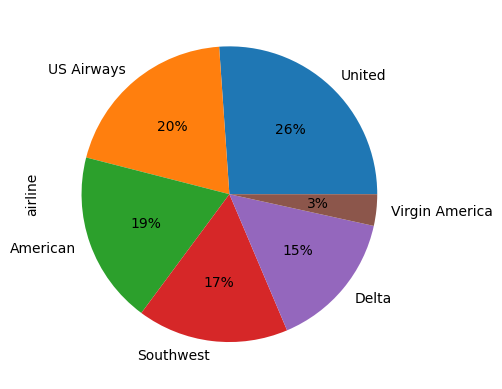

In [10]:
# Airline Split
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

<Axes: ylabel='airline_sentiment'>

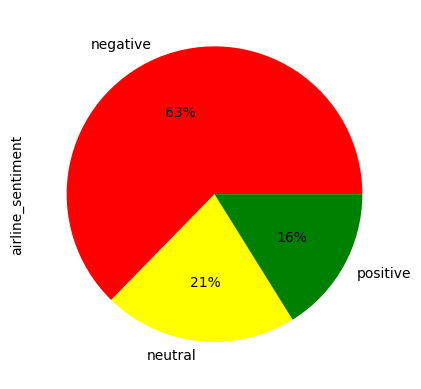

In [11]:
# Visualing the sentiments of users
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

<Axes: xlabel='airline'>

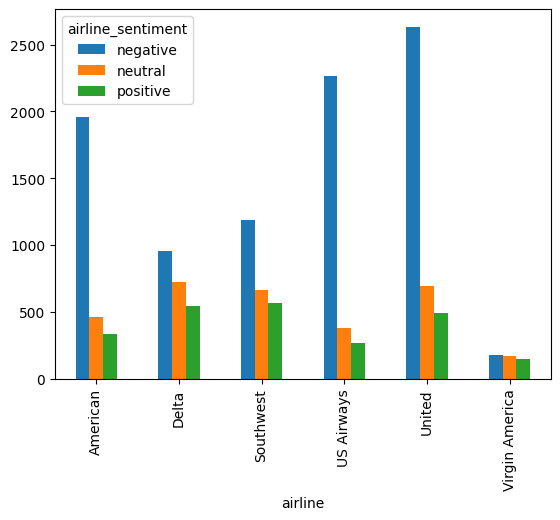

In [12]:
# Split Sentiment for each airline
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

<Axes: xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

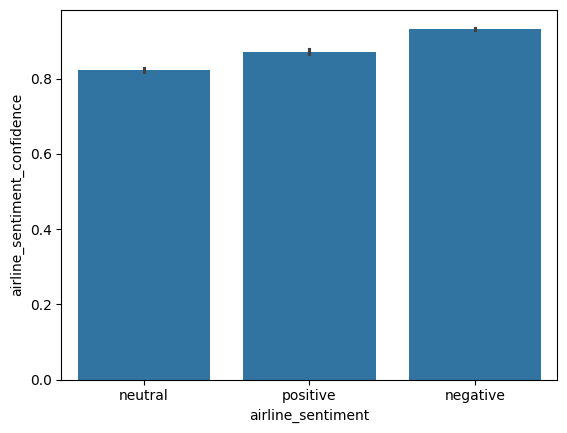

In [13]:
# Confident of sentiment labels being correctly labeled
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence', data=airline_tweets)

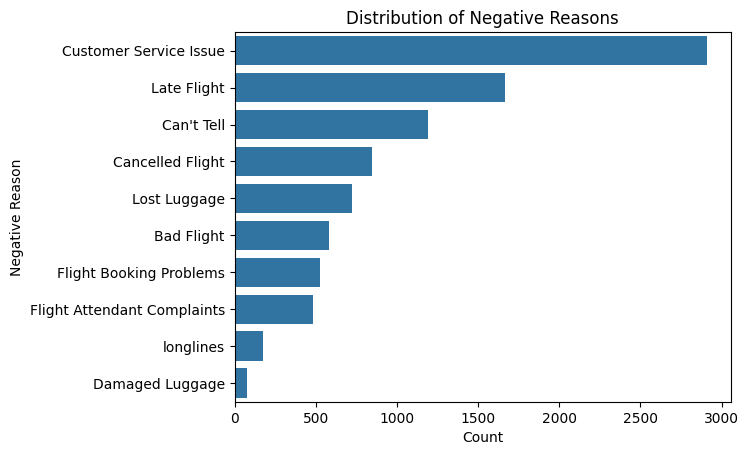

In [36]:
# Negative Reasons Distribution
sns.countplot(y='negativereason', data=airline_tweets, order = airline_tweets['negativereason'].value_counts().index)
plt.title('Distribution of Negative Reasons')
plt.xlabel('Count')
plt.ylabel('Negative Reason')
plt.show()


<ipython-input-38-a3b33c001535>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airline_tweets['airline_sentiment_confidence'][airline_tweets['airline_sentiment_confidence'] > 0.5])


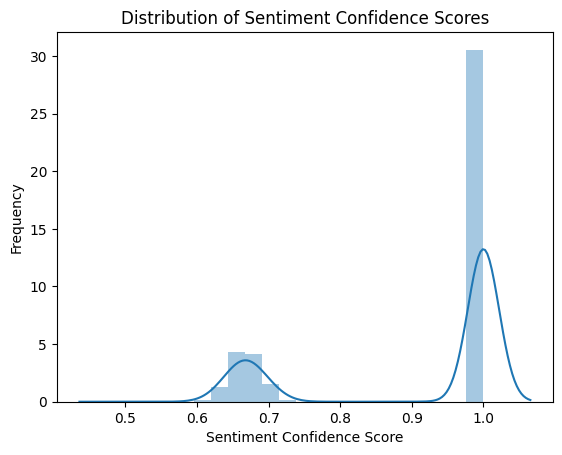

In [38]:
# Sentiment Confidence Distribution
sns.distplot(airline_tweets['airline_sentiment_confidence'][airline_tweets['airline_sentiment_confidence'] > 0.5])
plt.title('Distribution of Sentiment Confidence Scores')
plt.xlabel('Sentiment Confidence Score')
plt.ylabel('Frequency')
plt.show()


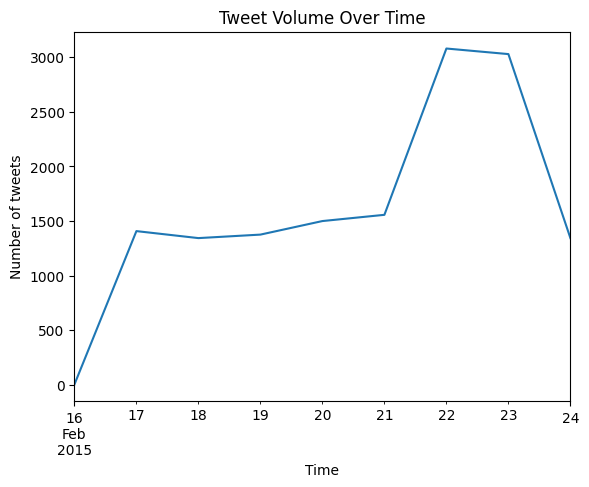

In [39]:
# Tweet Volume Over Time
airline_tweets['tweet_created'] = pd.to_datetime(airline_tweets['tweet_created'])
airline_tweets.set_index('tweet_created', inplace=True)
airline_tweets['counts'] = 1
airline_tweets.resample('D').size().plot()
plt.title('Tweet Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Number of tweets')
plt.show()

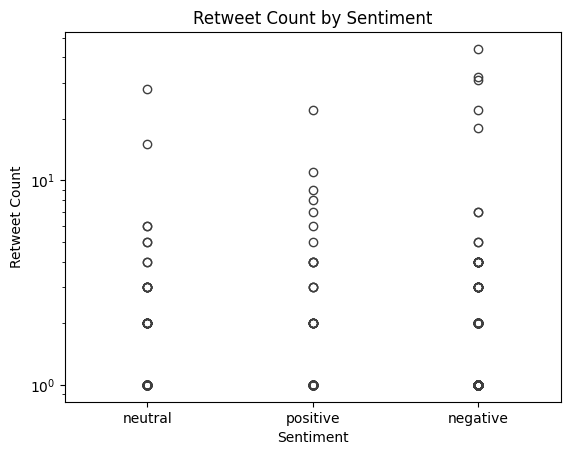

In [40]:
# Retweet Count and Sentiment
sns.boxplot(x='airline_sentiment', y='retweet_count', data=airline_tweets)
plt.title('Retweet Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Retweet Count')
plt.yscale('log')  # Use logarithmic scale if there are outliers
plt.show()

In [5]:
# Preprocessing the data

In [6]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values
len(features)

14640

In [26]:
# Preprocess the text before entering the model
processed_features = []
for sentence in range(0, len(features)):
  # Remove all the special Chars
  processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
  # Remove all single chars
  processed_feature = re.sub(r'\s+[a-zA-Z]\s', ' ', processed_feature)
  # Remove single chars from the start
  processed_feature = re.sub(r'\^[a-zA-Z]\s', ' ', processed_feature)
  # Substituting multiple spaces with single space
  processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
  # Removing prefixed 'b'
  processed_feature = re.sub(r'^b\s+', '', processed_feature)
  # Converting to Lowercase
  processed_feature = processed_feature.lower()
  processed_features.append(processed_feature)

Streaming output truncated to the last 5000 lines.
 usairways not to mention the fact that my flight was delayed because your computers were down
 usairways cannot add my frequent flyer number on your website can you help 
 usairways how do get off my plane and wait over an hour and half to speak to someone about reflight booking problems 
 usairways please don trivialize me this is joke not slow day or slow experience
 usairways and how do you only have 1 agent at phx customer service desk when an hour ago the line was over 100 people long 
 usairways sorry doesn help it midnight pst how in the hell am still on hold after 90 minutes on customer service line 
 usairways like thought this was america when did us airways start operating under the rules of communist russia 
 usairways you guys should be nice and just give your routes to jet blue and southwest at least they treat their customers properly 
 usairways but nope apparently this is the way you guys do business guess m flying so

In [14]:
# ٍSupervised ML Model to predict the label according to the feature

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features_vec = vectorizer.fit_transform(processed_features).toarray()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(processed_features_vec, labels, test_size=0.2, random_state=0)

In [18]:
text_classifier = RandomForestClassifier(n_estimators=500, random_state=0)
text_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [19]:
predictions = text_classifier.predict(X_test)

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928



In [23]:
# test a sample text from the dataset
rand_index = np.random.randint(0,len(processed_features))
test_sample = processed_features[rand_index]
print(test_sample)

 united think we both have the same status nothing think there was bug in your search system 


In [24]:
vector = vectorizer.transform([test_sample])
output = text_classifier.predict(vector.toarray())
print(output)

['negative']
